# DIFMI: Let's generate a new Miguel

In [1]:
from src import models as models
from src import utils as utils
utils.misc.setup_reproducable(42)

In [2]:
image_shape = (3, 128, 128)
dataset = utils.misc.get_data_from_path(
    image_size=image_shape[1],
    augment_count=4096,
    batch_size=64,
    path="./data/miguel",
)

In [3]:
model = models.vae.CNNModel(
    image_shape=image_shape,
    hidden_dim=400,
    latent_dim=100
)

utils.train.train_helper(
    model=model,
    train_loader=dataset,
    loss_fn=model.loss_fn,
    lr=1e-5,
    epochs=2000,
    device="cuda"
)

train: 100%|██████████| 2000/2000 [24:14<00:00,  1.37it/s, loss=12.2] 


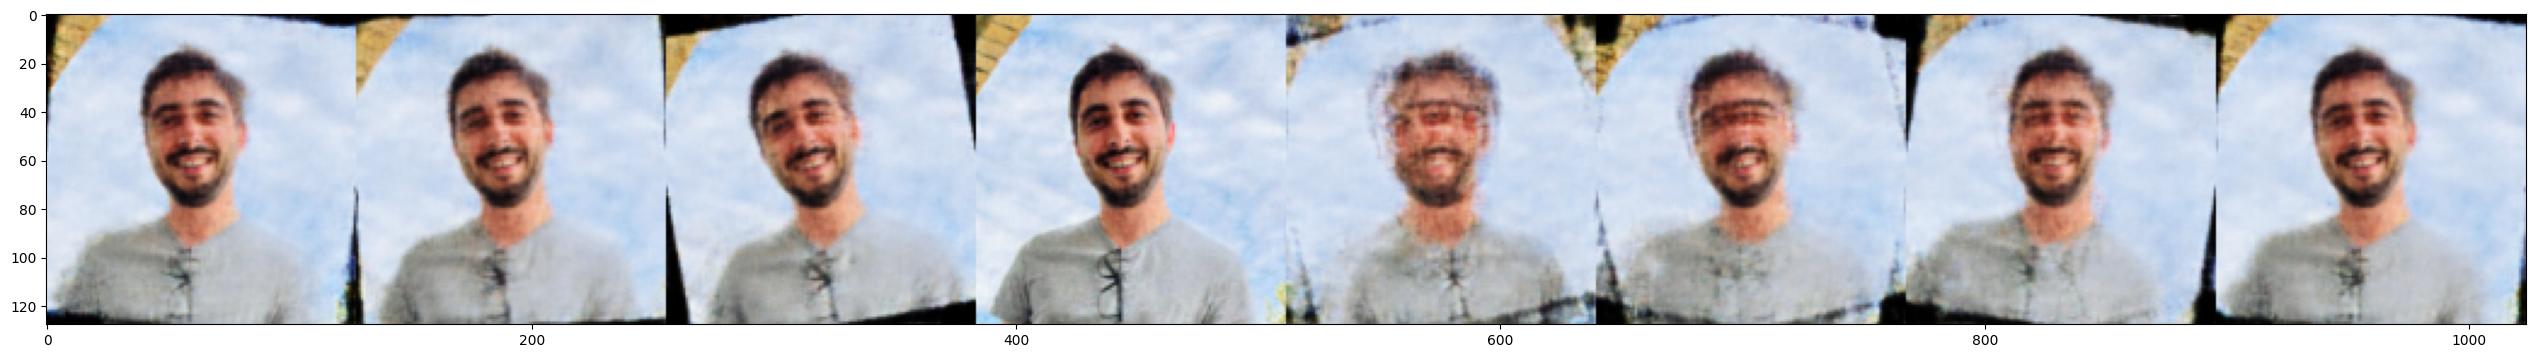

In [4]:
x = model.show_images(cols=4, rows=2)
utils.misc.plot_images(x)

In [5]:
lmodel = models.vae.LinearModel(
    image_shape=image_shape,
    hidden_dim=400,
    latent_dim=100
)

utils.train.train_helper(
    model=lmodel,
    train_loader=dataset,
    loss_fn=lmodel.loss_fn,
    lr=1e-5,
    epochs=2000,
    device="cuda"
)

train: 100%|██████████| 2000/2000 [14:16<00:00,  2.34it/s, loss=11.5] 


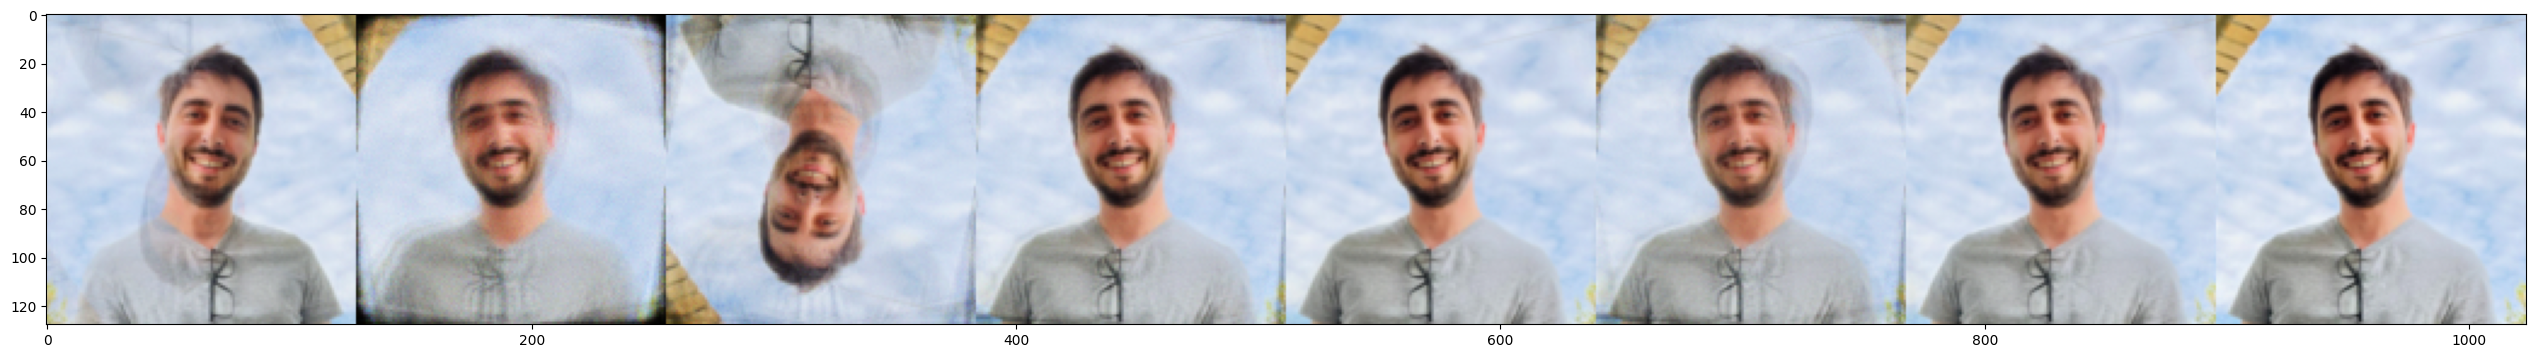

In [6]:
x = lmodel.show_images(cols=4, rows=2)
utils.misc.plot_images(x)